In [30]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [43]:
ds = pd.read_csv("../data/Tower-Hamlets-30-01-18/version-A/transitions.csv")
joiners = pd.read_csv("joiners.csv", header=None)
leavers = pd.read_csv("leavers.csv", header=None)

# The Question:
### Why do the total count of individuals in SEND not exactly match between a baseline run of the model, and scenario one?

In scenario one we are moving half of the transitions from out-of-borough settings to in borough
settings. We are not modifying the overall number of joiners or the initial population.

By 2027 there is an overall difference of 28 individuals in the total SEND population, between the
baseline and scenario one.

Here are the differences between the count of joiners and leavers to settings from within the model, over 10 years
and 10 simulations. The first number is the difference between two independent runs of the baseline, the second
number is the difference between one run of the baseline and scenario one (10 years, 10 simulations for both).

In [46]:
joiners

,0,1,2
0,:EO,0.28,0.85
1,:MMSIB,1.65,-2.40
2,:OOE,0.74,-0.11
3,:MSSOB,0.29,2.17
4,:IMS,0.50,0.33
5,:MSSOP,-0.41,0.13
6,:MAP,0.05,0.00
7,:FEC,0.24,-0.03
8,:MSSR,-0.25,-0.19
9,:NMSS,-0.20,-0.26


In [47]:
leavers

,0,1,2
0,:EO,0.72,0.49
1,:MMSIB,2.01,-0.36
2,:OOE,-1.79,-1.41
3,:MSSOB,0.14,1.15
4,:IMS,0.13,-0.07
5,:MSSOP,-0.27,-1.19
6,:MAP,-0.34,-0.58
7,:FEC,-0.17,0.08
8,:MSSR,-0.60,-0.80
9,:NMSS,0.33,-0.17


i.e. There was a difference of only 0.28 "people" who joined EO between two baseline runs

Positive values indicate the first run had "more" transitions, negative indicate the second run had more transitions.

### Conclusions of joiner/leaver counts

Generally there is little difference between the overall number of leavers and joiners. Good examples of changes we are applying having an expected outcome include :MSSIB and :MSSOB joiners, where we are wanting to increase the number of joiners to :MSSIB and reduce :MSSOB and we see this as :MSSIB has 2.24 more joiners overall in scenario one and :MSSOB has 2.17 less joiners overall in scenario one. Significantly more than when you compare the differences between independent baseline runs (<0.6)

In scenario one we are not directly effecting the leaver rates (only joiner and mover rates), however we do see some varition between the baseline and scenario one runs. Most striking is 4.23 more leavers from :MSSIB in scenario one. 

I hypothesise that because we are increasing the rate of joiners *to* :MSSIB, there is then a greater pool of individuals available to leave the setting, thus leading to a greater overall loss. I would imagine that the rate of "leaving" :MSSIB is quite high as it is quite a common setting.

In [76]:
print("Mean % of MSSIB in a year of total SEND population:", 
      (len(ds) / 4) / (len(ds[ds['setting-1'].str.match('MSSIB')]) / 4))

Mean % of MSSIB in a year of total SEND population: 5.980272108843537


In [32]:
transition_list = []

    
for index, row in ds.iterrows():
    transition_list.append((row["setting-1"], row["setting-2"]))


pairs = pd.DataFrame(transition_list, columns=['state1', 'state2'])
counts = pairs.groupby('state1')['state2'].value_counts()
probs = (counts / counts.sum()).unstack()

In [33]:
probs
# Transition matrix - NaN's probability = close to 0

state2,EO,EYS,FEC,IMS,ISS,ISSR,MAP,MMS,MMSIB,MMSOB,MSSIB,MSSOB,MSSOP,MSSR,MU,MUOB,NMSS,NMSSR,NONSEND,OOE
state1,,,,,,,,,,,,,,,,,,,,
EO,0.004095,NaN,NaN,0.000114,0.000114,NaN,NaN,NaN,0.000114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001024,NaN
EYS,NaN,0.000683,NaN,NaN,NaN,NaN,NaN,NaN,0.002503,NaN,0.001138,NaN,NaN,NaN,0.001024,NaN,NaN,NaN,0.000341,NaN
FEC,NaN,NaN,0.003640,NaN,NaN,NaN,NaN,NaN,0.000114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000683,0.000114
IMS,NaN,NaN,NaN,0.007621,NaN,NaN,NaN,NaN,0.000796,0.000228,NaN,NaN,NaN,NaN,0.000228,NaN,NaN,NaN,0.000455,0.000341
ISS,0.000228,NaN,0.000341,0.000341,0.014447,NaN,0.000910,NaN,NaN,NaN,0.000569,0.000341,NaN,0.000228,0.000114,NaN,0.000341,NaN,0.002389,0.000341
ISSR,0.000114,NaN,NaN,NaN,0.000114,0.003526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000569,0.000228
MAP,0.000228,NaN,0.000114,0.000114,0.000341,NaN,0.005119,NaN,0.000114,NaN,0.000228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002730,NaN
MMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000228,0.001706,0.000114,0.000569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MMSIB,0.000569,NaN,0.005346,0.001479,0.001820,NaN,0.002275,NaN,0.432260,0.002161,0.012968,0.001479,NaN,0.000683,0.002503,NaN,0.000796,NaN,0.033557,0.003640


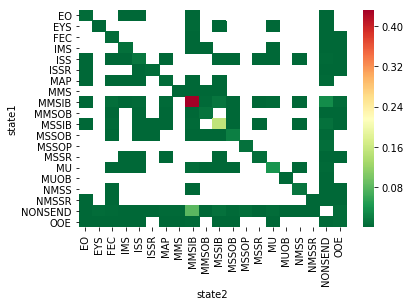

In [34]:
import seaborn as sns
sns.heatmap(probs, cmap='RdYlGn_r')

Heatmap of transition rates, where white = P ~0

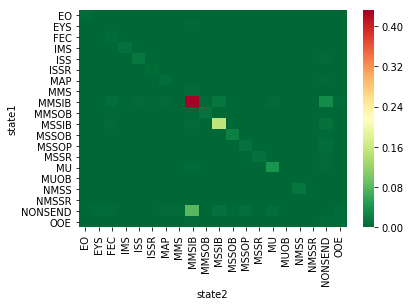

In [35]:
probs = probs.fillna(value=0)
sns.heatmap(probs, cmap='RdYlGn_r')

Heatmap of transition rates, where dark green = P ~0

In [36]:
print("MMSIB non-mover transitions rate:", probs['MMSIB']['MMSIB'])
print("Mean transition rate:", probs.mean().mean())

MMSIB non-mover transitions rate: 0.4322602661813218
Mean transition rate: 0.0025


MMSIB non-mover is the most common transition, and consequently muffles any signal from most other transitions

Decided to scale all values in the transition matrix

In [37]:
from sklearn import preprocessing
probs[probs.columns] = preprocessing.scale(probs[probs.columns])

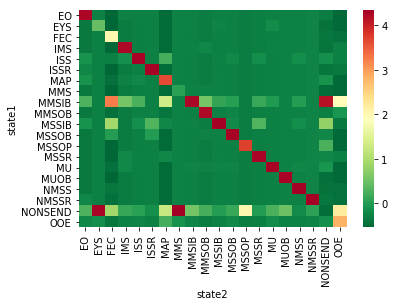

In [38]:
sns.heatmap(probs, cmap='RdYlGn_r')

Heatmap of scaled transition rates

Non-movers for (almost) all states now muffling a lot of the signal we're really interested in

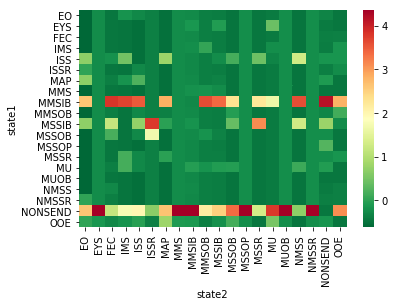

In [39]:
remove_non_movers = []

    
for index, row in ds.iterrows():
    if row["setting-1"] != row["setting-2"]:
        remove_non_movers.append((row["setting-1"], row["setting-2"]))
        
pairs = pd.DataFrame(remove_non_movers, columns=['state1', 'state2'])
counts = pairs.groupby('state1')['state2'].value_counts()
probs = (counts / counts.sum()).unstack()
probs = probs.fillna(value=0)
probs[probs.columns] = preprocessing.scale(probs[probs.columns])
sns.heatmap(probs, cmap='RdYlGn_r')

Heatmap of all state to state (mover, joiner, leaver) scaled transitions

Leavers from MSSIB are indeed a bit more common than average (light green), however not as common as another settings we are "adding" to MMSIB (dark red).

We can see however the mean number of individuals in MMSIB in a typical (historic) year is much less than MSSIB

In [79]:
print("Mean % of MMSIB in a year of total SEND population:", 
      (len(ds) / 4) / (len(ds[ds['setting-1'].str.match('MMSIB')]) / 4))
print("Mean % of MSSIB in a year of total SEND population:", 
      (len(ds) / 4) / (len(ds[ds['setting-1'].str.match('MSSIB')]) / 4))

Mean % of MMSIB in a year of total SEND population: 1.993876162395101
Mean % of MSSIB in a year of total SEND population: 5.980272108843537


So overall there a fewer "available" to leave.

# Conclusion of rate analysis



Leaver rates (i.e. transition to NONSEND) are generally higher in in-borough settings (than out-of-borough settings), due the overall higher number of individuals in the respective settings historically, i.e. more people "available to join, move and leave, thus affecting the rates.

In scenario one this then leads to a greater number (not rate) of indiviudals leaving SEND overall, as more individuals in in-borough settings, means there will be a greater number of leavers overall.